# Módulo 3: Regressão Linear Múltipla - Análise Empresarial Avançada


**Objetivo:** Prever vendas com base nos investimentos em TV, Rádio e Jornal.  
**Aplicação real:** Análise de marketing e otimização de orçamento de mídia.
  * DADOS: "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv"

In [ ]:
from os import uname_result
# importando variaveis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#importando os dados
url= "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv"
df = pd.read_csv(url)
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# captar informações data frame
df.describe()

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## 🔍 Análise Exploratória dos Dados

<Axes: >

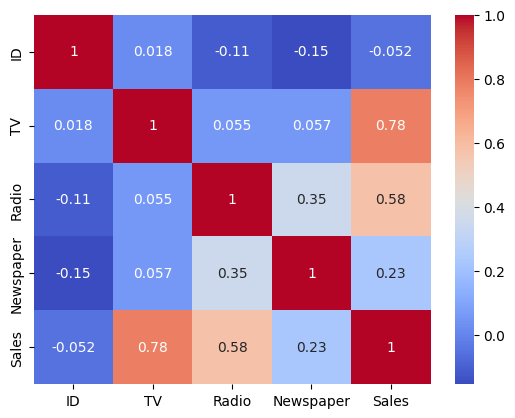

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

Interprete os valores de média, mínimo e máximo para entender como as empresas têm investido em cada canal.

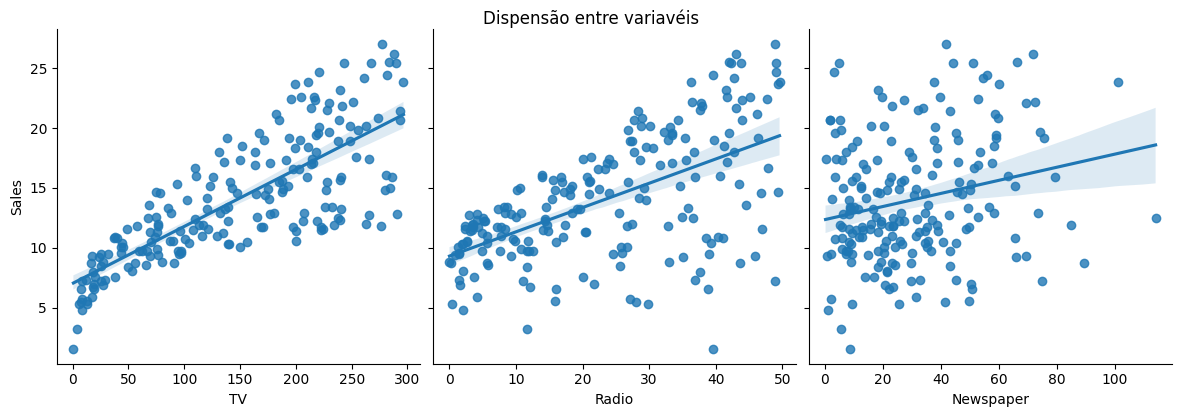

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.suptitle('Dispensão entre variavéis', y=1.02)
plt.show()

Quais variáveis parecem ser mais importantes para prever Sales? Qual tem menor influência?

In [ ]:
# Escreva seu código

Com base nos gráficos, quais variáveis você acredita que têm maior poder de explicação sobre vendas?

## 🧪 Separando Variáveis

In [ ]:
# selecionando as variáveis que serão os eixos

x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

## 📉 Multicolinearidade - VIF (Variance Inflation Factor)

In [ ]:
# Escreva seu código
x_vif = sm.add_constant(x) # Cria uma variavel x_vif que é uma constante
vif= pd.DataFrame() # Cia uma estrtura em dataFrame vazia
vif["Variável"]= x_vif.columns
vif

,Variável
0,const
1,TV
2,Radio


In [ ]:
# Escreva seu código


Quando o VIF seria um problema? O que você faria se um VIF estivesse acima de 10?

## 📊 Avaliação do Modelo

In [ ]:
# Escreva seu código
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

O modelo é bom? Justifique usando as 3 métricas. Qual delas penaliza mais os erros grandes?

In [ ]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

O que os coeficientes nos dizem sobre o impacto de cada tipo de mídia?

## 📈 Gráfico: Valor Real vs Valor Previsto

In [ ]:
coef = pd.DataFrame({'variavel': x.columns, 'Coeficiente': modelo.coef_})
coef

,variavel,Coeficiente
0,TV,0.044728
1,Radio,0.190667


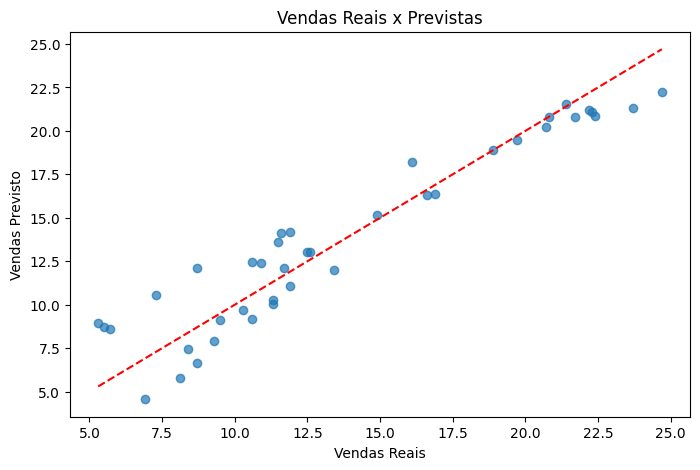

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')

plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previsto')
plt.title('Vendas Reais x Previstas')
plt.show()

Esse gráfico mostra um bom ajuste? O que você esperaria ver se o modelo fosse ruim?

## Melhore o modelo para obter um r quadrado maior que com as 3 variaveis.


In [ ]:
x = df[['TV', 'Radio']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = LinearRegression()

modelo.fit(x_train, y_train)
y_pred = modelo.predict(X_test)

print("R²",r2_score(y_test, y_pred))
print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R² 0.9005833101920356
MAE 1.4443023138227578
MSE 3.137948009068354
RMSE 1.7714254173033517
